# This is a Python implementation of the Lab on linear regression from Chapter 3

In [33]:
# import the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *


## The data set used in the lab is the Boston data set (available on the book website). This contains the median house value for 506 census tracts in Boston. Each median house value is accompanied by 12 predictors, such as the average number of rooms per house ('rm'), the average age of the houses in the tract ('age'), the percentage of households with low socioeconomic status ('lstat'), and so on.

In [4]:
Boston = pd.read_csv('Boston.csv', header=0)
Boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
print(Boston.shape)

(506, 14)


## 1. Simple Linear Regression

### We start by creating a simple linear model of the response using 'lstat' as the single predictor.

In [8]:
linear_model = smf.ols('medv~lstat', data=Boston).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        17:01:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [17]:
print("Fitted parameters:")
print(linear_model.params)
print("\nConfidence intervals:")
print(linear_model.conf_int())

Fitted parameters:
Intercept    34.553841
lstat        -0.950049
dtype: float64

Confidence intervals:
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [18]:
# we can perform predictions using the model as follows
linear_model.predict(pd.DataFrame({'lstat' : [5, 10, 15]}))

0    29.803594
1    25.053347
2    20.303101
dtype: float64

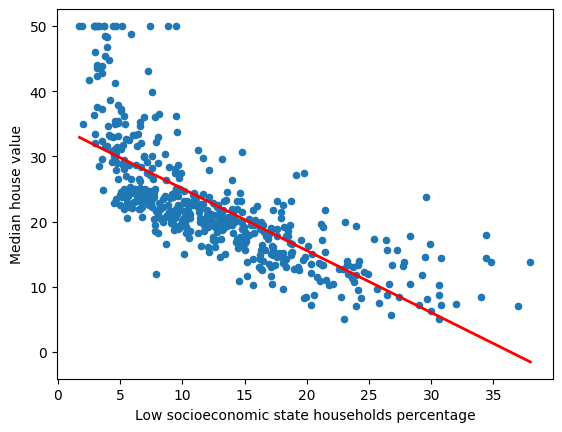

In [19]:
# we plot the data and the fitted model on a single plot
x = pd.DataFrame({'lstat' : [Boston.lstat.min(), Boston.lstat.max()]}) # note that we only need two values to plot a linear model
predictions = linear_model.predict(x)
Boston.plot(kind = 'scatter', x = 'lstat', y = 'medv')
plt.plot(x, predictions, color='red', linewidth = 2)
plt.xlabel("Low socioeconomic state households percentage")
plt.ylabel("Median house value")
plt.show()

### We can see that there is some non-linearity in the relationship between lstat and medv, so a simple linear regression on that variable is not perfect. To analyse the fit further we plot additional plots below. These include the residuals of each prediction against the predicted value. Additionally, we also plot the studentised residuals, i.e., divided by its estimated standard error. In the cases where the studentised residuals are greater than 3, we can consider the data point an outlier.

Text(0, 0.5, 'studentised residuals')

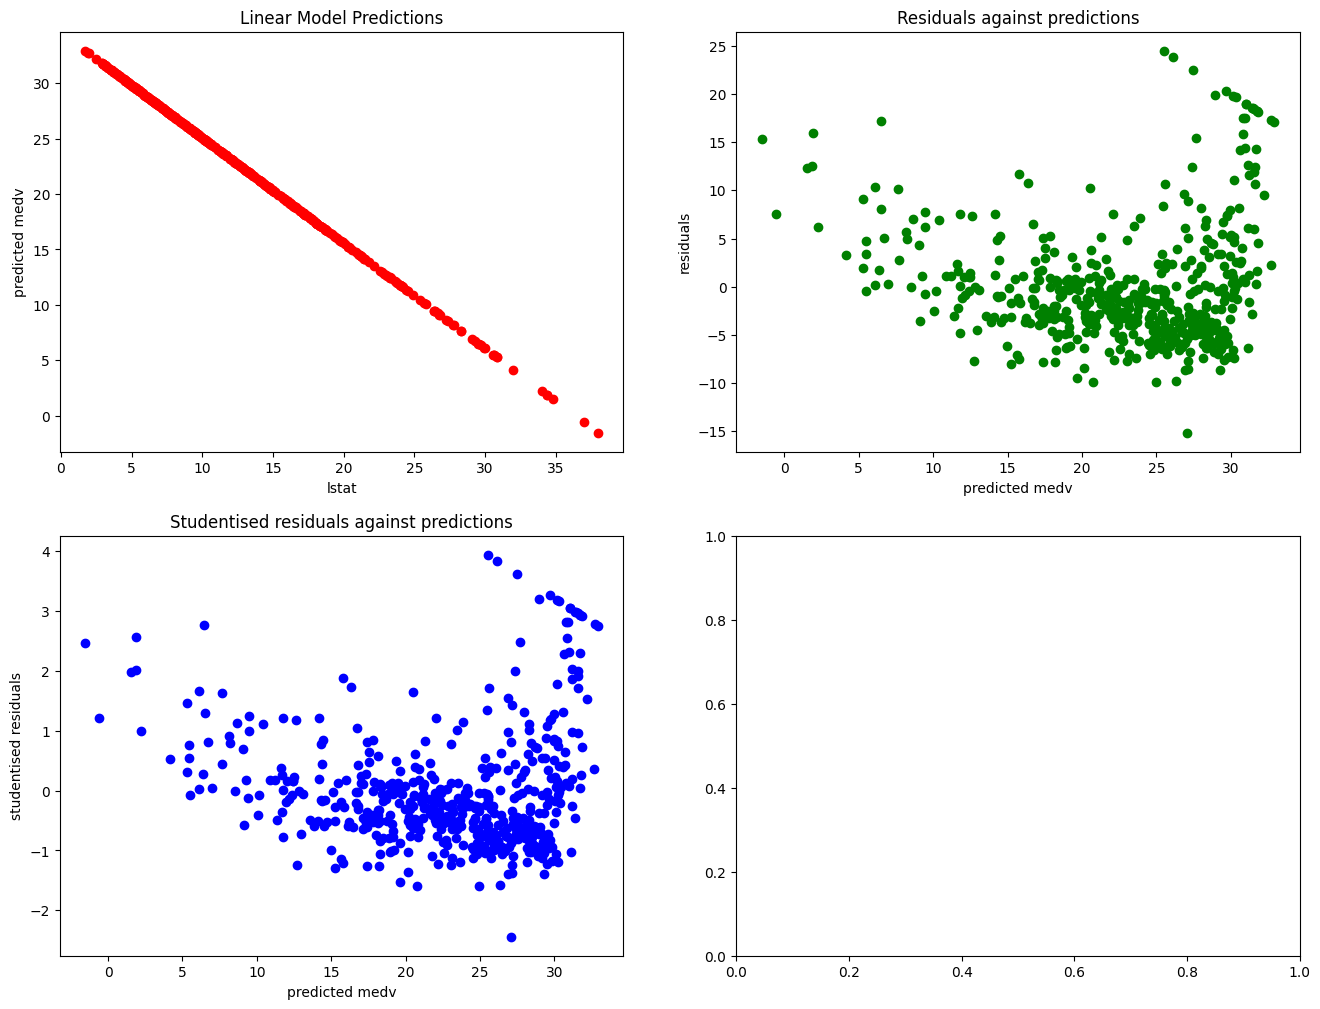

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 12))
ax1.plot(Boston.lstat, linear_model.predict(), 'ro')
ax1.set_title("Linear Model Predictions")
ax1.set_xlabel("lstat")
ax1.set_ylabel("predicted medv")
ax2.plot(linear_model.predict(), linear_model.resid, 'go')
ax2.set_title("Residuals against predictions")
ax2.set_xlabel("predicted medv")
ax2.set_ylabel("residuals")
ax3.plot(linear_model.predict(), linear_model.resid_pearson, 'bo')
ax3.set_title("Studentised residuals against predictions")
ax3.set_xlabel("predicted medv")
ax3.set_ylabel("studentised residuals")

### From the additional residuals' plots we can further observe non-linearity in the data. We can also find the leverages of different points, which quantifies how unusual the value of a given predictor is.

The data set entry with the highest leverage for the lstat property is 374 . It has a leverage of 0.026865166510283492
Figure(640x480)


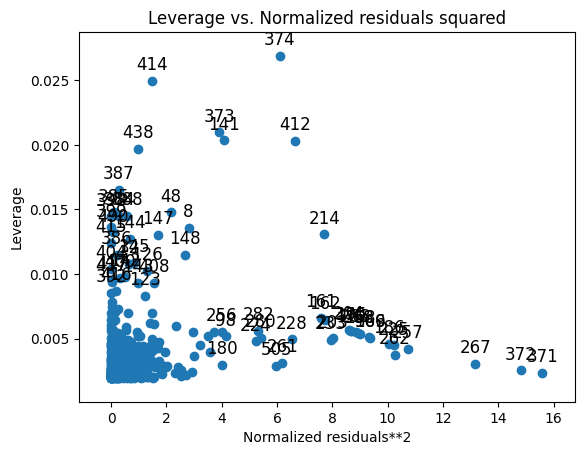

In [36]:
print("The data set entry with the highest leverage for the lstat property is", np.argmax(linear_model.get_influence().hat_matrix_diag),
". It has a leverage of", np.max(linear_model.get_influence().hat_matrix_diag))

print(plot_leverage_resid2(linear_model))

### The plot above allows us to simultaneosuly see points in the data set with high leverage and high studentised residuals.

## 2. Multiple Linear Regression

In [37]:
# multiple linear regressions are made in an analogous way
linear_model_multiple = smf.ols('medv~lstat+age', data=Boston).fit()
print(linear_model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           2.98e-88
Time:                        18:49:26   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [49]:
# we can also perform the regression on all available features
regression_formula = "medv~" + '+'.join(Boston.columns[1:-1])
linear_model_all = smf.ols(regression_formula, data=Boston).fit()
print(linear_model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          2.23e-133
Time:                        18:55:30   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

### Note that the features 'age' and 'indus' have large p-values. Hence, we consider performing a linear regression without them.

In [50]:
regression_formula = "medv~" + '+'.join(Boston.columns[1:-1].difference(['indus', 'age']))
linear_model_modified = smf.ols(regression_formula, data=Boston).fit()
print(linear_model_modified.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.73e-135
Time:                        18:59:06   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.4517      4.903      8.454      0.0

## 3. Interaction Terms
### We can also consider linear regression models with interaction features.

In [51]:
linear_model_interaction = smf.ols("medv~lstat*age", data=Boston).fit()
print(linear_model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           4.86e-88
Time:                        19:04:16   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### We have used the interaction between the lstat and age features. We know from the previous section that the latter has a very large p-value, which can also be seen from the data for the current model. Hence, the inclusion of this interaction term has led to no significant increase in predictive power.

## 4. Non-linear Data Transformations
### We can also consider models including non-linear functions of the features as predictors. Here, we fit models using the also the squared lstat feature

In [52]:
linear_model_order_1 = smf.ols('medv~lstat', data=Boston).fit()
linear_model_order_2 = smf.ols('medv~lstat + I(lstat ** 2)', data=Boston).fit()

print(linear_model_order_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          1.56e-112
Time:                        19:13:35   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

### From the observed low p-value of the coefficient for the squared feature, as well as the increased $R^2$ value, we can conclude that this non-linear model seems to perform better than the simple linear regression. This was to be expected from the observed non-linearity in the plots above. In fact, we can plot these once more including the new model.

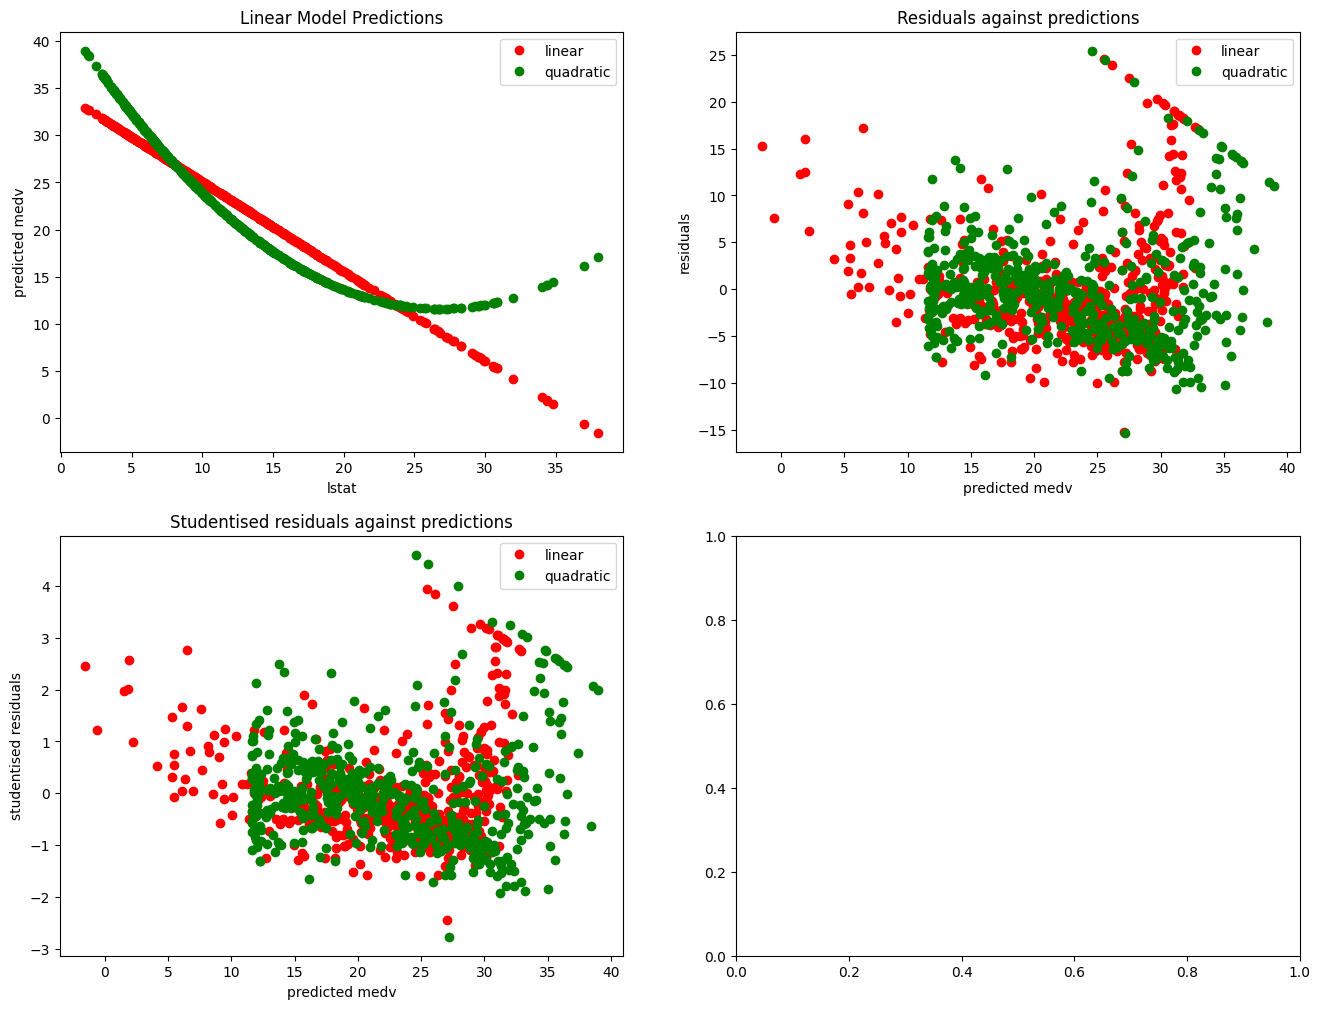

In [62]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 12))
ax1.plot(Boston.lstat, linear_model_order_1.predict(), 'ro', label = "linear")
ax1.plot(Boston.lstat, linear_model_order_2.predict(), 'go', label = "quadratic")
ax1.set_title("Linear Model Predictions")
ax1.set_xlabel("lstat")
ax1.set_ylabel("predicted medv")
ax1.legend()
ax2.plot(linear_model_order_1.predict(), linear_model_order_1.resid, 'ro', label = "linear")
ax2.plot(linear_model_order_2.predict(), linear_model_order_2.resid, 'go', label = "quadratic")
ax2.set_title("Residuals against predictions")
ax2.set_xlabel("predicted medv")
ax2.set_ylabel("residuals")
ax2.legend()
ax3.plot(linear_model_order_1.predict(), linear_model_order_1.resid_pearson, 'ro', label = "linear")
ax3.plot(linear_model_order_2.predict(), linear_model_order_2.resid_pearson, 'go', label = "quadratic")
ax3.set_title("Studentised residuals against predictions")
ax3.set_xlabel("predicted medv")
ax3.set_ylabel("studentised residuals")
ax3.legend()

### We can also perform a null-hypothesis test between the two model, where the alternative is that the quadratic model leads to an improvement.

In [63]:
table = sm.stats.anova_lm(linear_model_order_1, linear_model_order_2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


### We can see that the $F$-statistic, as well as the $p$-value are in favour of the alternative hypothesis, implying once more that the inclusion of the quadratic term leads to a better model.

### We can even include higher polynomial orders into the regression.

In [76]:
highest_order = 5
model_formula = "medv~"
for order in range(highest_order):
    model_formula = model_formula + "I(lstat ** " + str(order + 1) +")"
    if order < highest_order - 1:
        model_formula += "+"

linear_model_multi_order = smf.ols(model_formula, data=Boston).fit()
print(linear_model_multi_order.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.73e-122
Time:                        19:29:54   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783

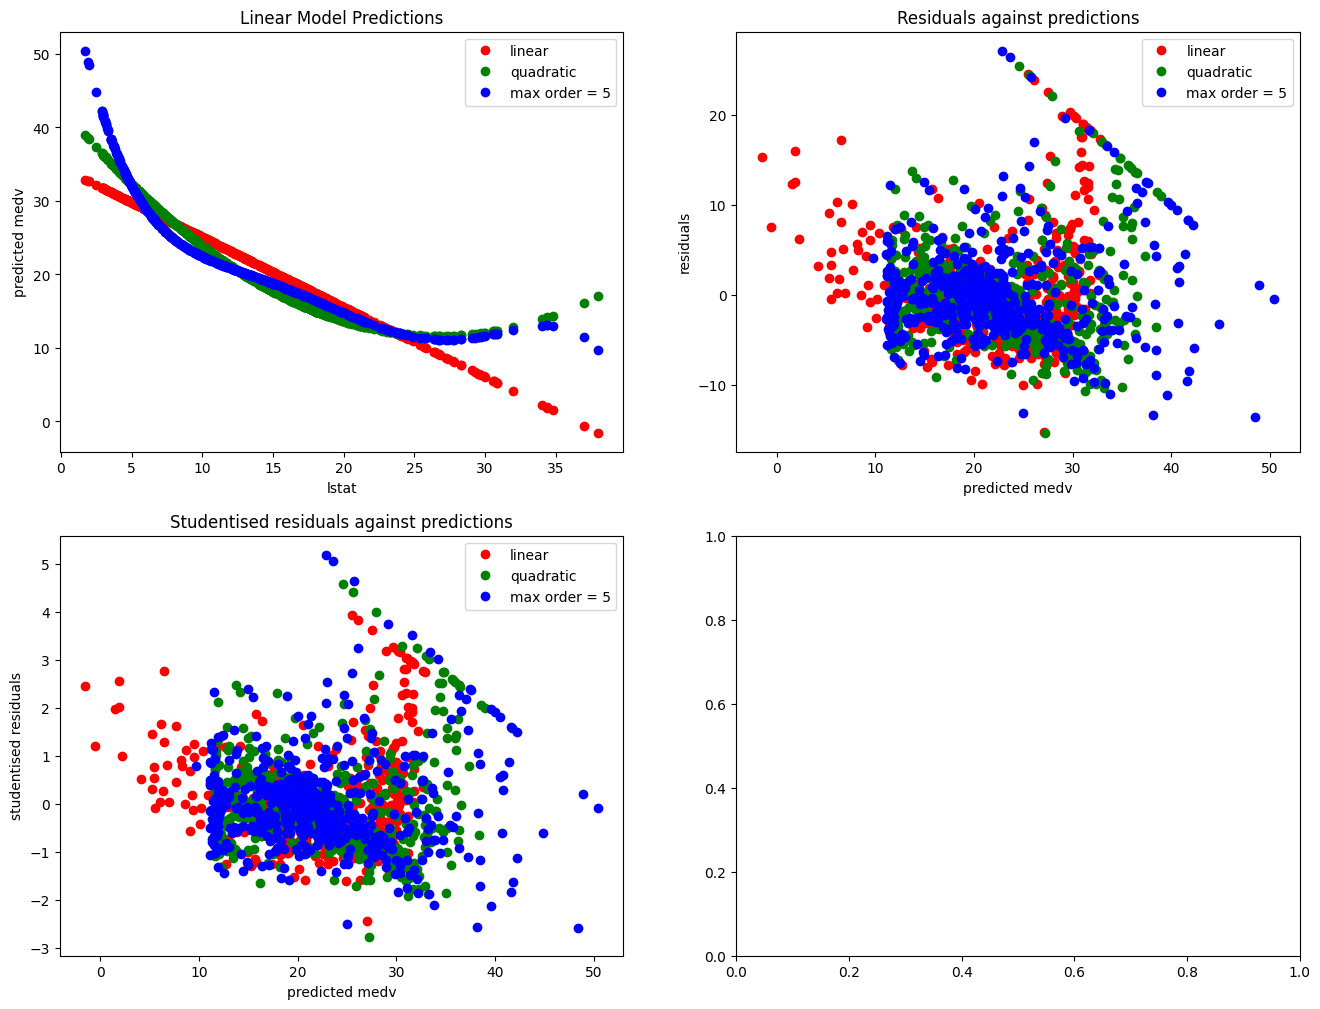

In [95]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (16, 12))
ax1.plot(Boston.lstat, linear_model_order_1.predict(), 'ro', label = "linear")
ax1.plot(Boston.lstat, linear_model_order_2.predict(), 'go', label = "quadratic")
ax1.plot(Boston.lstat, linear_model_multi_order.predict(), 'bo', label = "max order = " + str(highest_order))
ax1.set_title("Linear Model Predictions")
ax1.set_xlabel("lstat")
ax1.set_ylabel("predicted medv")
ax1.legend()
ax2.plot(linear_model_order_1.predict(), linear_model_order_1.resid, 'ro', label = "linear")
ax2.plot(linear_model_order_2.predict(), linear_model_order_2.resid, 'go', label = "quadratic")
ax2.plot(linear_model_multi_order.predict(), linear_model_multi_order.resid, 'bo', label = "max order = " + str(highest_order))
ax2.set_title("Residuals against predictions")
ax2.set_xlabel("predicted medv")
ax2.set_ylabel("residuals")
ax2.legend()
ax3.plot(linear_model_order_1.predict(), linear_model_order_1.resid_pearson, 'ro', label = "linear")
ax3.plot(linear_model_order_2.predict(), linear_model_order_2.resid_pearson, 'go', label = "quadratic")
ax3.plot(linear_model_multi_order.predict(), linear_model_multi_order.resid_pearson, 'bo', label = "max order = " + str(highest_order))
ax3.set_title("Studentised residuals against predictions")
ax3.set_xlabel("predicted medv")
ax3.set_ylabel("studentised residuals")
ax3.legend()

### Once the highest order feature is set to more than 5 we start seeing large $p$-values, and no (significant) increase in $R^2$.

## 5. Qualitative Variables
### We now consider linear models on data sets containing qualitative features.

In [78]:
Carseats = pd.read_csv('Carseats.csv', header=0)
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [80]:
print(Carseats.dtypes)

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


### We see that the data set contains the ShelveLoc variable which is qualitative. It takes on values Good, Medium, or Bad. We compare two models -- one containing the qualitative feature through a dummy variable, and one without it.

In [93]:
linear_model_without_dummy = smf.ols('Sales~Income + Advertising + Price * Age', data=Carseats).fit()
print(linear_model_without_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     48.23
Date:                Tue, 06 Sep 2022   Prob (F-statistic):           6.92e-39
Time:                        19:50:42   Log-Likelihood:                -886.85
No. Observations:                 400   AIC:                             1786.
Df Residuals:                     394   BIC:                             1810.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.3697      1.929     10.042      

In [90]:
ShelveLoc_dummies = pd.get_dummies(Carseats.ShelveLoc, prefix='ShelveLoc')
print(ShelveLoc_dummies.head())
# remove the ShelveLoc_Bad variable since it is unnecessary
ShelveLoc_dummies = ShelveLoc_dummies.iloc[:, 1:]
print(ShelveLoc_dummies.head())

# add the dummy variables to the data set data frame
Carseats_with_dummy = pd.concat([Carseats, ShelveLoc_dummies], axis=1)
print(Carseats_with_dummy.head())

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium
0              1               0                 0
1              0               1                 0
2              0               0                 1
3              0               0                 1
4              1               0                 0
   ShelveLoc_Good  ShelveLoc_Medium
0               0                 0
1               1                 0
2               0                 1
3               0                 1
4               0                 0
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Educat

In [91]:
linear_model_with_dummy = smf.ols('Sales~Income + Advertising + Price*Age + ShelveLoc_Good + ShelveLoc_Medium', data=Carseats_with_dummy).fit()
print(linear_model_with_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.78e-101
Time:                        19:50:20   Log-Likelihood:                -735.87
No. Observations:                 400   AIC:                             1488.
Df Residuals:                     392   BIC:                             1520.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.8604      1.354  

### This has led to a large increase in the $R^2$ statistic, meaning that the inclusion of the dummy variables has contributed significant predictive power. Note, however, that we can also use a built-in functionality to deal with such qualitative variables. Let us consider which approach is better.

In [94]:
linear_model_built_in = smf.ols('Sales~Income + Advertising + Price * Age + C(ShelveLoc)', data=Carseats).fit()
print(linear_model_built_in.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 06 Sep 2022   Prob (F-statistic):          8.78e-101
Time:                        19:54:07   Log-Likelihood:                -735.87
No. Observations:                 400   AIC:                             1488.
Df Residuals:                     392   BIC:                             1520.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 14

### There seems to be no difference at all, so we shall just stick with the built-in functionality in the future.